# imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# scv read 

In [2]:
mydataset = pd.read_csv('conn_attack.csv')

# 1. first we will look on the table for first emprashen check size, colums etc

#### we wanted to know how many data we hendle

In [5]:
mydataset.shape

(256670, 4)

In [6]:
#show all the columns we have
mydataset.columns

Index(['record ID', 'Duration', 'src_bytes', 'dst_bytes'], dtype='object')

In [4]:
#show the firest element
mydataset.head()

,record ID,Duration,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


In [5]:
#show the last valuse
mydataset.tail()

,record ID,Duration,src_bytes,dst_bytes
256665,256666,0,306,236
256666,256667,0,288,4017
256667,256668,0,289,1096
256668,256669,0,198,2169
256669,256670,0,212,2288


# 2. we check every feature on his own and try to detect suspicous things

### Duration:

In [7]:
count_durtion = mydataset['Duration'].value_counts()
count_durtion

0      255168
3         122
1         104
5          55
2          43
        ...  
328         1
277         1
314         1
624         1
715         1
Name: Duration, Length: 368, dtype: int64

In [6]:
mydataset['Duration'].min()

0

In [7]:
mydataset['Duration'].max()

3289

In [8]:
mydataset['Duration'].mean()

0.6409358320021817

<AxesSubplot:xlabel='Duration'>

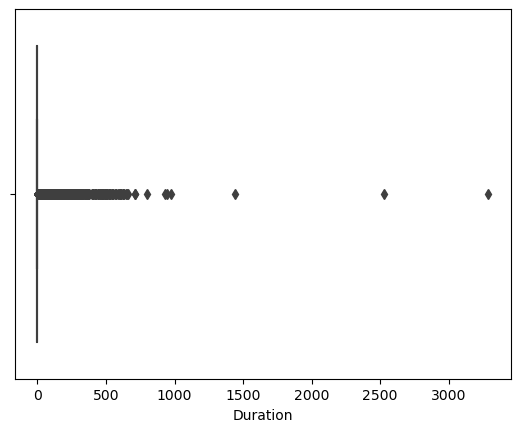

In [10]:
sns.boxplot(x='Duration', data = mydataset)

#### write about the dur

### dst_bytes:

In [11]:
# show all the diffrent values in dst_bytes colum and how many are from each
count_dst = mydataset['dst_bytes'].value_counts()
count_dst

2698     1412
1380     1251
2239     1148
2507     1147
3222     1116
         ... 
21621       1
10101       1
14641       1
28101       1
14180       1
Name: dst_bytes, Length: 17063, dtype: int64

<AxesSubplot:xlabel='dst_bytes', ylabel='count'>

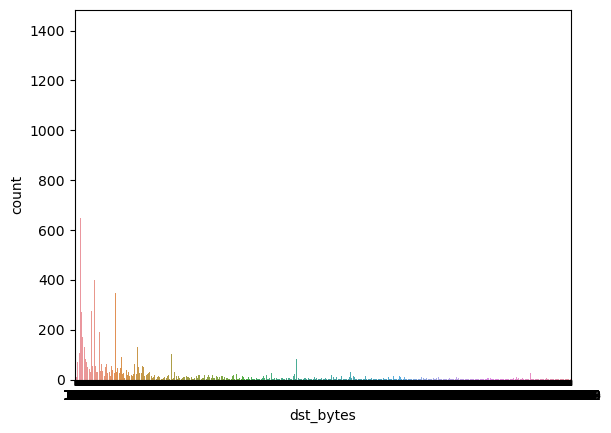

In [14]:
sns.countplot(x='dst_bytes' ,data=mydataset )

In [9]:
mydataset['dst_bytes'].min()

0

In [10]:
mydataset['dst_bytes'].max()

7068759

In [11]:
mydataset['dst_bytes'].mean()

4473.532613862158

<AxesSubplot:xlabel='dst_bytes'>

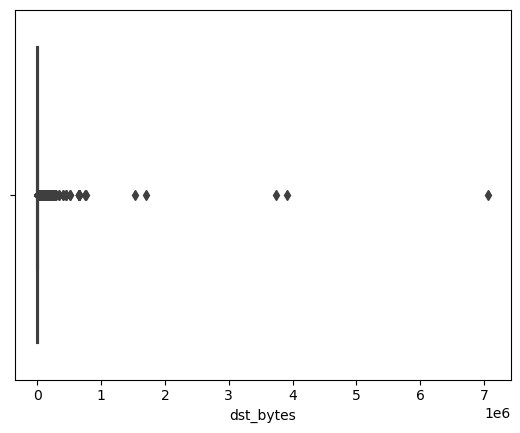

In [15]:
sns.boxplot(x='dst_bytes', data = mydataset)

#### con for dst

### src_bytes:

In [16]:
# show all the diffrent values in dst_bytes colum and how many are from each
count_src = mydataset['src_bytes'].value_counts()
count_src

216     2646
221     2614
224     2558
208     2552
215     2546
        ... 
1379       1
9219       1
137        1
520        1
623        1
Name: src_bytes, Length: 473, dtype: int64

<AxesSubplot:xlabel='src_bytes', ylabel='count'>

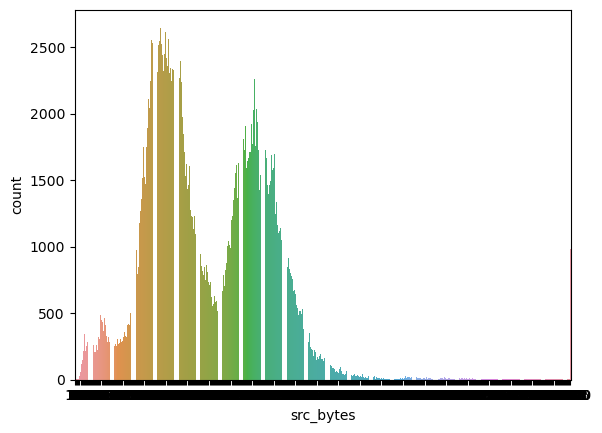

In [19]:
sns.countplot(x='src_bytes' ,data=mydataset )

In [12]:
mydataset['src_bytes'].min()

0

In [13]:
mydataset['src_bytes'].max()

54540

In [14]:
mydataset['src_bytes'].mean()

474.2478980792457

<AxesSubplot:xlabel='src_bytes'>

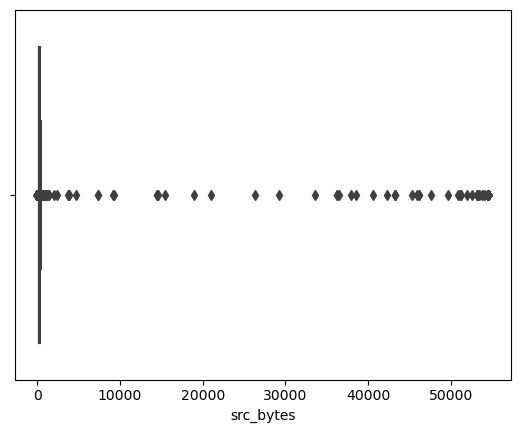

In [20]:
sns.boxplot(x='src_bytes', data = mydataset)

#### con for src

# 3. secand thing we do is to check the dependency between every 2 colums

#### src_bytes - dst_bytes:

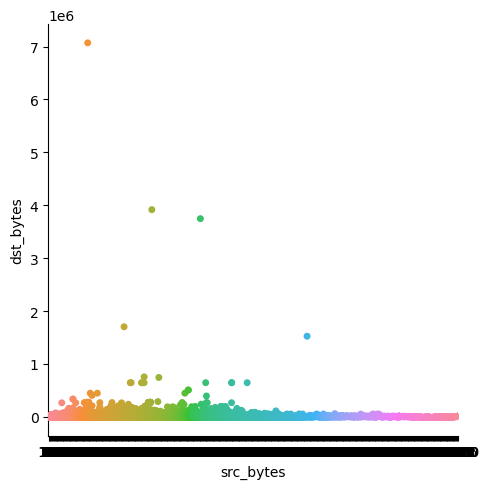

In [21]:
sns.catplot(x = 'src_bytes', y='dst_bytes', data = mydataset)

#### con 

#### src_bytes - Duration:

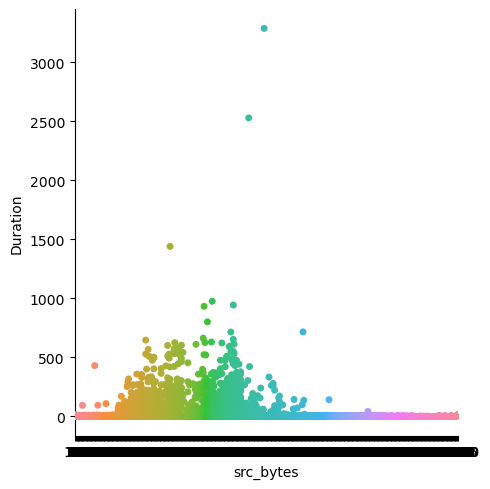

In [22]:
sns.catplot(x = 'src_bytes', y='Duration', data = mydataset)

#### con

#### dst_bytes - Duration:

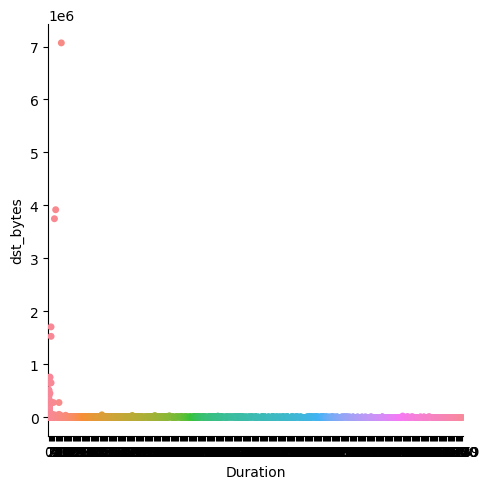

In [15]:
sns.catplot(x = 'Duration', y='dst_bytes', data = mydataset)

#### con

In [ ]:
sns.catplot(x = 'dst_bytes', y='Duration', data = mydataset)

# 4. we check the depend of all togther

#### src_bytes-dst_bytes /Duration

In [ ]:
sns.relplot(x = 'src_bytes', y='dst_bytes', hue = 'Duration',data = mydataset)

#### con

# 5. more things we check

### we check the src+dst - Duration:

In [16]:
mydataset['sum'] = mydataset['src_bytes']+mydataset['dst_bytes']

In [17]:
mydataset

,record ID,Duration,src_bytes,dst_bytes,sum
0,1,0,236,1228,1464
1,2,0,239,486,725
2,3,0,234,1364,1598
3,4,0,239,1295,1534
4,5,0,181,5450,5631
...,...,...,...,...,...
256665,256666,0,306,236,542
256666,256667,0,288,4017,4305
256667,256668,0,289,1096,1385
256668,256669,0,198,2169,2367


#### con

#### dst_bytes/src_bytes:

In [9]:
mydataset['dst_per_src'] = mydataset['dst_bytes']/(mydataset['src_bytes']+1)

In [10]:
mydataset['dst_per_src'].min()

0.0

In [11]:
mydataset['dst_per_src'].max()

39053.91712707182

In [12]:
mydataset['dst_per_src'].mean()

18.64758115508217

<AxesSubplot:xlabel='dst_per_src'>

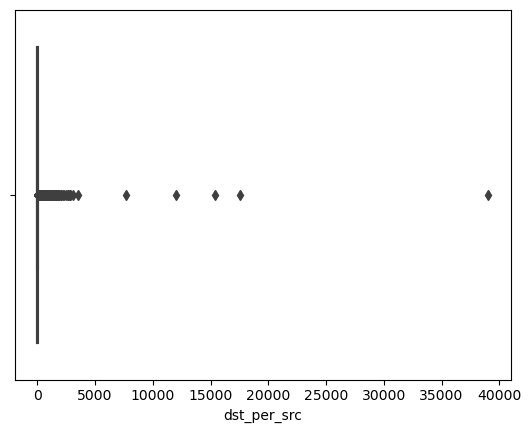

In [13]:
sns.boxplot(x='dst_per_src', data = mydataset)